# 500_Analysis_Q2B

# _Question Two: What Vehicles are involved in the most road accidents?_

## _(B): Is it safer to travel by car than by motorcycle?_


## Purpose
In this notebook we will explore what types of vehicles are involved in the most road accidents. In particular, we will analyse the type of vehicle and determine which is the safest. To do this, we will look at which vehicle has the most number of accidents and on average which has the greatest number of casualties. Additionally, we will look at the severity of accidents for each vehicle type to onclude which incurs the most/least fatal, serious and slightly severe accidents. Finally, we will use the data provided on the weather conditions to see which vehicle type is the safest in (e.g.): weather conditions.

## Notebook Contents:
* __1:__ Loading our Datasets
   
* __2:__ The range of years that we will be using for this research question.

* __3:__ Which type of vehicle has the highest number of accidents?

* __4:__ On average, which vehicle type has the most casualties?
      
* __5:__ Which type of vehicle is involved in the most fatally severe accidents?

* __6:__ Is one vehicle type safer than another in rainy weather conditions?
    
* __7:__ Saving Data to a Pickle File

* __8:__ Creating Data Dictionaries

## Datasets
__Input:__ 
* 800_Q2B_final_prep_1.pkl   (Data needed for Q2B for years 1979-2004)
* 800_Q2B_final_prep_2.pkl   (Continuation of data needed for Q2B for years 1979-2004)
* 800_Q2B_final_prep_3.pkl   (Data needed for Q2B for years 2005-2016)


__Output:__ 
* 500_Analysis_Q2B_norm_All_Num_Veh_Accidents.pkl   (Number of accidents for each vehicle type)
* 500_Analysis_Q2B_All_Number_of_Casualties.pkl   (Average number of casualties for each vehicle type)
* 500_Analysis_Q2B_norm_All_Number_Accident_Severity.pkl   (Normalised accident severity for each vehicle type)
* 500_Analysis_Q2B_norm_All_weather_conditions_groups.pkl   (Normalised weather conditions for vehicle type)
* 500_Analysis_Q2B_norm_rain_analysis_all.pkl   (Normalised rain analysis for vehicle type)

In [1]:
import os
import sys

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

module_path = os.path.abspath(os.path.join('../../data/..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.helpers import data_dictionary

%matplotlib inline

# 1. Loading the Datasets

Since we have cleaned our initial dataset and saved only the columns which are relevant to this research question in separate pickle files, we will read in these cleaned datasets for the purpose of answering this research question.

In [2]:
Q2B_1 = pd.read_pickle('../../data/processed/800_Q2B_final_prep_1.pkl')
Q2B_1.shape

(2832462, 18)

In [3]:
Q2B_2 = pd.read_pickle('../../data/processed/800_Q2B_final_prep_2.pkl')
Q2B_2.shape

(1818065, 18)

In [4]:
Q2B_3 = pd.read_pickle('../../data/processed/800_Q2B_final_prep_3.pkl')
Q2B_3.shape

(3194330, 18)

# 2. The range of years that we will be using for this research question
Below you can see the first two rows of the first dataset and the last two rows of the third and final dataset. By looking at the 'Date' column you can see that the data ranges from 1993 - 2016.

In [5]:
Q2B_1.head(2)

,Accident_Index,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Vehicle_Type,Vehicle_Manoeuvre,Sex_of_Driver,Date_day,Month,Year
5968608,1993010SA0120,slight,3,2,18/02/1993,friday,16:45,33,daylight,fine no high winds,dry,none,car,waiting to go - held up,male,18,2,1993
5968609,1993010SA0120,slight,3,2,18/02/1993,friday,16:45,33,daylight,fine no high winds,dry,none,car,waiting to go - held up,male,18,2,1993


In [6]:
Q2B_3.tail(2)

,Accident_Index,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Vehicle_Type,Vehicle_Manoeuvre,Sex_of_Driver,Date_day,Month,Year
479546,2016984131316,slight,1,3,29/10/2016,sunday,20:00,917,darkness - lights lit,fine no high winds,dry,none,car,going ahead other,male,29,10,2016
479547,2016984133416,slight,1,2,25/12/2016,monday,12:30,917,daylight,raining + high winds,wet or damp,none,car,going ahead other,male,25,12,2016


# 3. Which type of vehicle has the highest number of accidents?

Here we will specifically look at which type of vehicle is involved in the most road accidents. This will then allow us to evaluate which vehicle type is involved in the most road accidents.

### Groupby

* We will group the data by the 'Vehicle_Type' which specifies the type of vehicle involved in the road accident. 
* We will then count the number of accidents for each vehicle type by using the 'Accident_Index' column. 
  Each row in the 'Accident_Index' column represents an accident. Therefore, by counting the number of rows in the 'Accident_Index' column for each type of vehicle we will get the number of accidents for each.

#### Q2B_1

In [7]:
Q2B_1.columns

Index(['Accident_Index', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Date', 'Day_of_Week', 'Time',
       'Local_Authority_(District)', 'Light_Conditions', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Special_Conditions_at_Site', 'Vehicle_Type',
       'Vehicle_Manoeuvre', 'Sex_of_Driver', 'Date_day', 'Month', 'Year'],
      dtype='object')

In [8]:
Veh_Type_Q2B_1 = Q2B_1.groupby('Vehicle_Type')[['Accident_Index']].count()
Veh_Type_Q2B_1

,Accident_Index
Vehicle_Type,
agricultural vehicle,886
bus or coach,76557
car,2146688
goods 7.5 tonnes mgw and over,10953
goods over 3.5t. and under 7.5t,3930
goods vehicle over 3.5 tonnes,79402
minibus,11113
motorcycle,154451
motorcycle - scooter,3765


We noticed that there was a mistake from one of our prep notbooks from when we were mapping strings to values. Above you can see that motorcylce was spelt wrong ("motorcyle") resulting in two columns for motorcycle. As we only want one columns for this we will fix this mistake here by mapping the correct string. It will also mean that the same mistake will be in the other two dataframes being used to answer this research question and therefore will also have to correct them.

_Note:_ We made the decision to fix the problem in this analysis notebook as otherwise we would have had to run multiple prep notebooks which each take a long time to run. This way was just more efficient for us.

In [9]:
Motorcycle_map = {'motorcyle':'motorcycle'}

In [10]:
Q2B_1['Vehicle_Type'] = Q2B_1['Vehicle_Type'].apply(lambda i: Motorcycle_map.get(i) if i in Motorcycle_map else i)

In [11]:
Veh_Type_Q2B_1 = Q2B_1.groupby('Vehicle_Type')[['Accident_Index']].count()
Veh_Type_Q2B_1

,Accident_Index
Vehicle_Type,
agricultural vehicle,886
bus or coach,76557
car,2146688
goods 7.5 tonnes mgw and over,10953
goods over 3.5t. and under 7.5t,3930
goods vehicle over 3.5 tonnes,79402
minibus,11113
motorcycle,174834
motorcycle - scooter,3765


Above you can see that the mistake has now been corrected as it has summed the values for 'motorcycle' and 'motorcyle' to give a total value of 174834 for 'motorcycle'.

#### Q2B_2

In [12]:
Q2B_2['Vehicle_Type'] = Q2B_2['Vehicle_Type'].apply(lambda i: Motorcycle_map.get(i) if i in Motorcycle_map else i)

In [13]:
Veh_Type_Q2B_2 = Q2B_2.groupby('Vehicle_Type')[['Accident_Index']].count()
Veh_Type_Q2B_2

,Accident_Index
Vehicle_Type,
agricultural vehicle,3711
bus or coach,48990
car,1379436
goods 7.5 tonnes mgw and over,50850
goods over 3.5t. and under 7.5t,11238
minibus,6100
motorcycle,134153
pedal cycle,87545
ridden horse,738


#### Q2B_3

In [14]:
Q2B_3['Vehicle_Type'] = Q2B_3['Vehicle_Type'].apply(lambda i: Motorcycle_map.get(i) if i in Motorcycle_map else i)

In [15]:
Veh_Type_Q2B_3 = Q2B_3.groupby('Vehicle_Type')[['Accident_Index']].count()
Veh_Type_Q2B_3

,Accident_Index
Vehicle_Type,
agricultural vehicle,6567
bus or coach,79528
car,2337863
electric motocycle,86
goods 7.5 tonnes mgw and over,65552
goods over 3.5t. and under 7.5t,22609
goods vehicle,1378
minibus,8615
mobility scooter,842


### Aggregate Results
Below we will create a new dataframe containing the number of accidents for each vehicle type for all of the 3 dataframes created above.

We will also rename the 'Accident_Index' column to 'Accident_Count' as the column contains the number of accidents for each type of vehicle (calculated in above cells).

Finally, we will group the data by the 'Vehicle_Type' column which specifies the type of vehicle involved in the accident. We will then sum the 'Accident_Count' for each group to get the total number of accidents for each vehicle type.

In [16]:
All_Num_Veh_Accidents = pd.concat([Veh_Type_Q2B_1, Veh_Type_Q2B_2, Veh_Type_Q2B_3])
All_Num_Veh_Accidents = All_Num_Veh_Accidents.rename(columns={'Accident_Index': 'Accident_Count'})
All_Num_Veh_Accidents.head()

,Accident_Count
Vehicle_Type,
agricultural vehicle,886
bus or coach,76557
car,2146688
goods 7.5 tonnes mgw and over,10953
goods over 3.5t. and under 7.5t,3930


In [17]:
All_Num_Veh_Accidents = All_Num_Veh_Accidents.groupby(level=0).sum()
All_Num_Veh_Accidents

,Accident_Count
Vehicle_Type,
agricultural vehicle,11164
bus or coach,205075
car,5863987
electric motocycle,86
goods 7.5 tonnes mgw and over,127355
goods over 3.5t. and under 7.5t,37777
goods vehicle,1378
goods vehicle over 3.5 tonnes,79402
minibus,25828


### Normalise
Next, we will normalise the data by the total number of road accidents. We will do this by dividing the count for each vehicle type by the total number of accidents and get a %.

In [18]:
norm_All_Num_Veh_Accidents = All_Num_Veh_Accidents.copy() # create a dataframe as copy of original

In [19]:
cols = norm_All_Num_Veh_Accidents.columns  # define columns to normalise

In [20]:
sum_rows = norm_All_Num_Veh_Accidents[cols].sum(axis=0) # calculate the sum of each row

In [21]:
# divide each column in each row by the total sum of the row
norm_All_Num_Veh_Accidents[cols] = norm_All_Num_Veh_Accidents[cols].div(sum_rows, axis=1)

In [22]:
# Multiply normalised data by 100 to get a %
percentage_norm_All_Num_Veh_Accidents = 100*norm_All_Num_Veh_Accidents[cols]
percentage_norm_All_Num_Veh_Accidents.head()

,Accident_Count
Vehicle_Type,
agricultural vehicle,0.142310
bus or coach,2.614133
car,74.749444
electric motocycle,0.001096
goods 7.5 tonnes mgw and over,1.623420


In the graph below you can see that cars account for ~74% of accidents on the road. There is a big difference between this and the next highest whichis motorcycles with ~7%. The data shows that electric motorcycles are involved in the least amount of accidents.

Text(0,0.5,'Vehicle_Type')

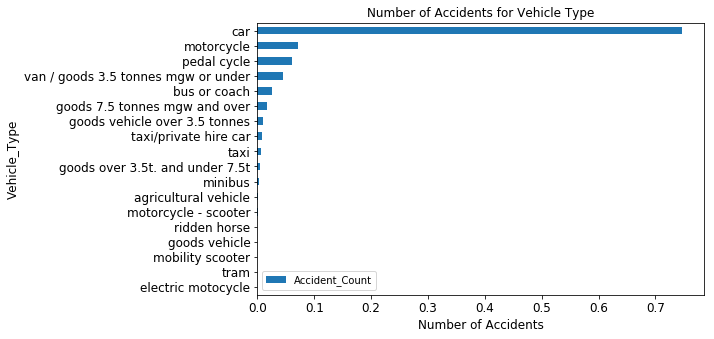

In [23]:
norm_All_Num_Veh_Accidents.sort_values(by='Accident_Count').plot(kind='barh', title='Number of Accidents for Vehicle Type', figsize=(8,5), fontsize=12)
plt.xlabel('Number of Accidents', fontsize=12)
plt.ylabel('Vehicle_Type', fontsize=12)

# 4. On average, which vehicle type has the most casualties?

Next, we will look at the average number of casualties for each vehicle type and determine which has the most and least.

### Groupby
* We will group the data by the type of vehicle involved in the accident using the 'Vehicle_Type' column.
* We will then get the average number of casualties in an accident for each vehicle type by using the 'Number_of_Casualties' column which gives the data on the number of casualties in each accident.

#### Q2B_1

In [24]:
Number_of_Casualties_groups_1 = Q2B_1.groupby('Vehicle_Type')[['Number_of_Casualties']].mean()
Number_of_Casualties_groups_1

,Number_of_Casualties
Vehicle_Type,
agricultural vehicle,1.390519
bus or coach,1.452081
car,1.492033
goods 7.5 tonnes mgw and over,1.453392
goods over 3.5t. and under 7.5t,1.441985
goods vehicle over 3.5 tonnes,1.487192
minibus,1.889229
motorcycle,1.165065
motorcycle - scooter,1.139177


#### Q2B_2

In [25]:
Number_of_Casualties_groups_2 = Q2B_2.groupby('Vehicle_Type')[['Number_of_Casualties']].mean()
Number_of_Casualties_groups_2

,Number_of_Casualties
Vehicle_Type,
agricultural vehicle,1.424953
bus or coach,1.490345
car,1.509616
goods 7.5 tonnes mgw and over,1.455162
goods over 3.5t. and under 7.5t,1.459690
minibus,1.838361
motorcycle,1.159490
pedal cycle,1.049152
ridden horse,1.231707


#### Q2B_3

In [26]:
Number_of_Casualties_groups_3 = Q2B_3.groupby('Vehicle_Type')[['Number_of_Casualties']].mean()
Number_of_Casualties_groups_3

,Number_of_Casualties
Vehicle_Type,
agricultural vehicle,1.356327
bus or coach,1.432099
car,1.507563
electric motocycle,1.081395
goods 7.5 tonnes mgw and over,1.426928
goods over 3.5t. and under 7.5t,1.421248
goods vehicle,1.391147
minibus,1.863146
mobility scooter,1.033254


### Aggregate Results
* Below we will create a new dataframe containing the average number of casualties for each vehicle type for all our 3 dataframes created above. 
* Each of these 3 dataframes contains the average number of casualties for each type of vehicle.
* After this we will group the data by the 'Vehicle_Type' and sum the values in each group to give us the total 'Number_of_Casualties' for each vehicle type.
* Finally, we will divde each group by 3 as there are three dataframes being contatenated. This will give us the "mean of means" to get the overall mean for each vehicle type.

In [27]:
All_Number_of_Casualties = pd.concat([Number_of_Casualties_groups_1, Number_of_Casualties_groups_2, Number_of_Casualties_groups_3])
All_Number_of_Casualties.head(20)

,Number_of_Casualties
Vehicle_Type,
agricultural vehicle,1.390519
bus or coach,1.452081
car,1.492033
goods 7.5 tonnes mgw and over,1.453392
goods over 3.5t. and under 7.5t,1.441985
goods vehicle over 3.5 tonnes,1.487192
minibus,1.889229
motorcycle,1.165065
motorcycle - scooter,1.139177


In [28]:
All_Number_of_Casualties = All_Number_of_Casualties.groupby(level=0).sum()/3 # get mean of means
All_Number_of_Casualties

,Number_of_Casualties
Vehicle_Type,
agricultural vehicle,1.390600
bus or coach,1.458175
car,1.503071
electric motocycle,0.360465
goods 7.5 tonnes mgw and over,1.445161
goods over 3.5t. and under 7.5t,1.440974
goods vehicle,0.463716
goods vehicle over 3.5 tonnes,0.495731
minibus,1.863578


From the plot below you can see that on average minibuses have the greatest number of casualties and mobility scooters have the least in a road accident.

Text(0,0.5,'Vehicle_Type')

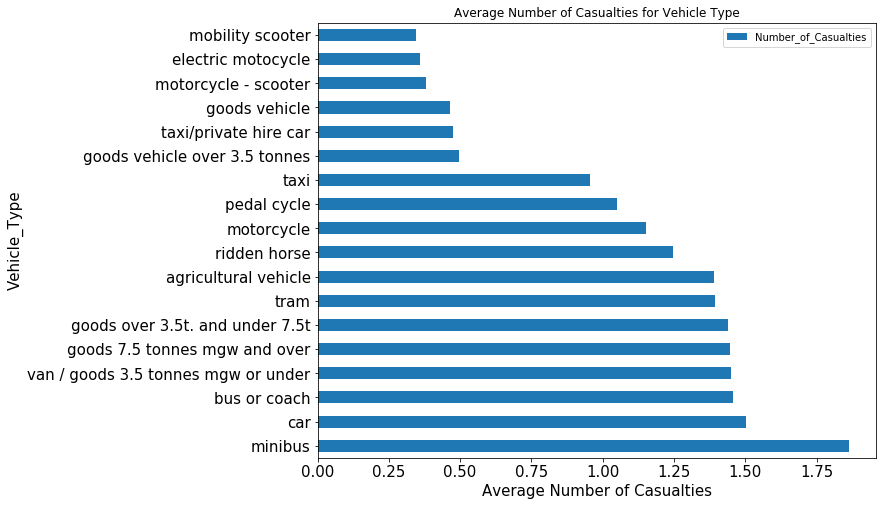

In [29]:
All_Number_of_Casualties.sort_values(by=['Number_of_Casualties'], ascending = False).plot(kind='barh', title='Average Number of Casualties for Vehicle Type', figsize=(10,8), fontsize=15)
plt.xlabel('Average Number of Casualties', fontsize=15)
plt.ylabel('Vehicle_Type', fontsize=15)

# 5. Which type of vehicle is involved in the most fatally severe accidents?

Next, we thought that it would be interesting to look at whether or not the type of vehicle involved in the accident affects the severity of the accident. From this we will be able to determine if accidents in a particular type of vehicle are more severe than in another.

### Groupby
Here, we will group the accidents by the 'Vehicle_Type' and 'Accident_Severity' columns. We will then count the total number of accidents for each group. 

_Note:_ The 'Vehicle_Type' is the type of vehicle involved in the accident and the 'Accident_Severity' tells us whether the severity of the accident is slight, serious or fatal.

#### Q2B_1

In [30]:
Accident_Severity_groups_1 = Q2B_1.groupby(['Vehicle_Type','Accident_Severity'])['Accident_Index'].count().unstack()
Accident_Severity_groups_1.head()

Accident_Severity,fatal,serious,slight
Vehicle_Type,,,
agricultural vehicle,19,184,683
bus or coach,949,9657,65951
car,25517,289769,1831402
goods 7.5 tonnes mgw and over,515,1872,8566
goods over 3.5t. and under 7.5t,107,612,3211


#### Q2B_2

In [31]:
Accident_Severity_groups_2 = Q2B_2.groupby(['Vehicle_Type','Accident_Severity'])['Accident_Index'].count().unstack()
Accident_Severity_groups_2.head()

Accident_Severity,fatal,serious,slight
Vehicle_Type,,,
agricultural vehicle,154,800,2757
bus or coach,632,5377,42981
car,16895,155174,1207367
goods 7.5 tonnes mgw and over,2268,8033,40549
goods over 3.5t. and under 7.5t,312,1584,9342


#### Q2B_3

In [32]:
Accident_Severity_groups_3 = Q2B_3.groupby(['Vehicle_Type','Accident_Severity'])['Accident_Index'].count().unstack()
Accident_Severity_groups_3.head()

Accident_Severity,fatal,serious,slight
Vehicle_Type,,,
agricultural vehicle,286.0,1384.0,4897.0
bus or coach,946.0,9183.0,69399.0
car,25979.0,256827.0,2055057.0
electric motocycle,NaN,24.0,62.0
goods 7.5 tonnes mgw and over,3282.0,10072.0,52198.0


### Aggregate Results
* Below we will create a new dataframe containing the number of fatal/serious/slight accidents for each vehicle type for all our 3 datasets.
* Each of these three dataframes contains the number of fatal, serious and slight accidents for each type of vehicle.
* We will then group the data by the 'Vehicle_Type' and sum the number of fatal, serious and slightly severe accidents for each group.

In [33]:
All_Number_Accident_Severity = pd.concat([Accident_Severity_groups_1, Accident_Severity_groups_2, Accident_Severity_groups_3]).groupby(level=0).sum()
All_Number_Accident_Severity

Accident_Severity,fatal,serious,slight
Vehicle_Type,,,
agricultural vehicle,459.0,2368.0,8337.0
bus or coach,2527.0,24217.0,178331.0
car,68391.0,701770.0,5093826.0
electric motocycle,0.0,24.0,62.0
goods 7.5 tonnes mgw and over,6065.0,19977.0,101313.0
goods over 3.5t. and under 7.5t,1037.0,5184.0,31556.0
goods vehicle,27.0,184.0,1167.0
goods vehicle over 3.5 tonnes,3595.0,15235.0,60572.0
minibus,527.0,3873.0,21428.0


Below you can see the number of fatal, serious and slight accidents for each vehicle type. 

It is quite clear from the plot that cars have a much higher number of slightly severe accidents in comparison to the other vehicle types. They also have a higher number of fatal and serious accidents.

Text(0,0.5,'Vehicle_Type')

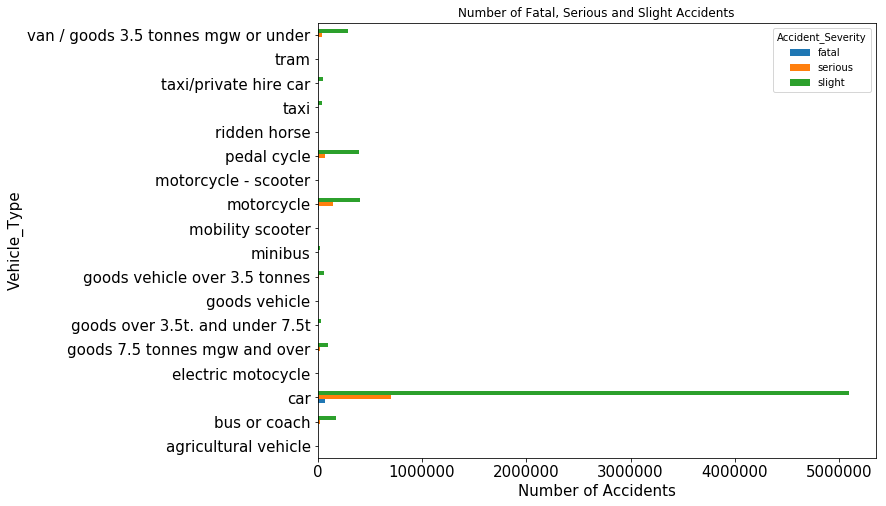

In [34]:
All_Number_Accident_Severity.plot(kind='barh', title='Number of Fatal, Serious and Slight Accidents', figsize=(10,8), fontsize=15)
plt.xlabel('Number of Accidents', fontsize=15)
plt.ylabel('Vehicle_Type', fontsize=15)

### Normalise
Next, we will normalise the data by the accident severity. We will do this by dividing each column by the total sum of data in all columns for each row in the dataframe. We will multiply each value in each row by 100 give a % of fatal, serious and slight accidents for each type of vehicle.

In [35]:
norm_All_Number_Accident_Severity = All_Number_Accident_Severity.copy()  # Create a dataframe as copy of original

In [36]:
cols_2 = norm_All_Number_Accident_Severity.columns  # Define columns to normalise

In [37]:
sum_rows_2 = norm_All_Number_Accident_Severity[cols_2].sum(axis=1) # Calculate the sum of each row

In [38]:
# Divide each column in each row by the total sum of the row
norm_All_Number_Accident_Severity[cols_2] = norm_All_Number_Accident_Severity[cols_2].div(sum_rows_2, axis=0)

In [39]:
# Multiply normalised data by 100 to get a %
percentage_norm_All_Number_Accident_Severity = 100*norm_All_Number_Accident_Severity[cols_2]
percentage_norm_All_Number_Accident_Severity

Accident_Severity,fatal,serious,slight
Vehicle_Type,,,
agricultural vehicle,4.111430,21.211035,74.677535
bus or coach,1.232232,11.808850,86.958917
car,1.166288,11.967455,86.866257
electric motocycle,0.000000,27.906977,72.093023
goods 7.5 tonnes mgw and over,4.762279,15.686074,79.551647
goods over 3.5t. and under 7.5t,2.745057,13.722635,83.532308
goods vehicle,1.959361,13.352685,84.687954
goods vehicle over 3.5 tonnes,4.527594,19.187174,76.285232
minibus,2.040421,14.995354,82.964225


After normalisation you can see in the graph below that all vehicle types have a much higher amount of slightly severe accidents in comparison to the number of serious and fatal accidents for each.

You can also see that electric motrcycles and motorcycles have a higher number of serious accidents than the other vehicle types.

Text(0,0.5,'Vehicle Type')

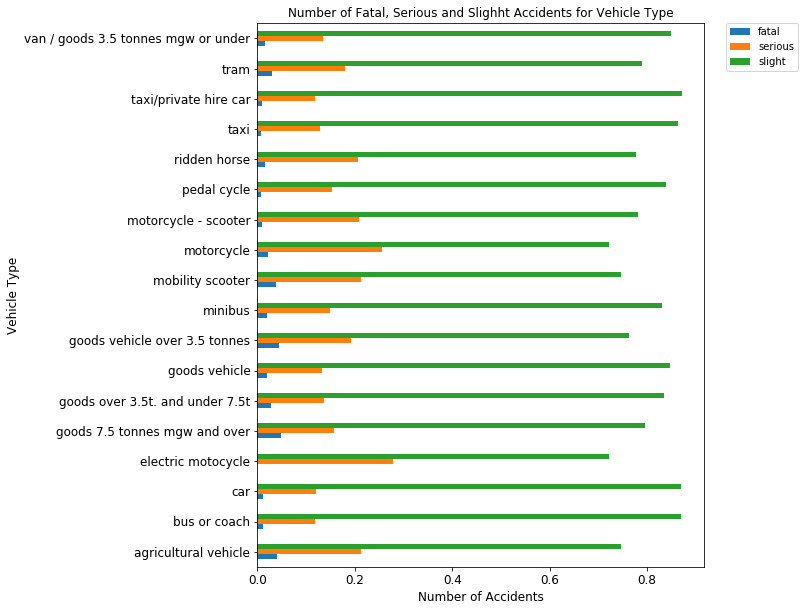

In [40]:
norm_All_Number_Accident_Severity.plot(kind='barh', title='Number of Fatal, Serious and Slighht Accidents for Vehicle Type', figsize=(8,10), fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Number of Accidents', fontsize=12)
plt.ylabel('Vehicle Type', fontsize=12)

# 6. Is one vehicle type safer than another in rainy weather conditions?
We were interested to find out if you are safer to tavel in a specific type of vehicle in rainy weather conditions. For this we will analyse the accident severity of each type of vehicle type in such decisions.

### Groupby
Firstly, we will group the data by the vehicle type and the weather conditions. We will then get the value_counts for each of vehicle type to give the number of slight/serious/fatal accidents for each.

#### Q2B_1

In [41]:
weather_conditions_groups_1 = Q2B_1.groupby(['Vehicle_Type','Weather_Conditions'])['Accident_Severity'].value_counts().unstack()
weather_conditions_groups_1.head()

Accident_Severity                          fatal  serious  slight
Vehicle_Type         Weather_Conditions                          
agricultural vehicle fine + high winds       1.0      4.0    12.0
                     fine no high winds     16.0    149.0   555.0
                     fog or mist             NaN      1.0     7.0
                     other                   1.0      4.0     7.0
                     raining + high winds    NaN      3.0     9.0

#### Q2B_2

In [42]:
weather_conditions_groups_2 = Q2B_2.groupby(['Vehicle_Type','Weather_Conditions'])['Accident_Severity'].value_counts().unstack()
weather_conditions_groups_2.head()

Accident_Severity                          fatal  serious  slight
Vehicle_Type         Weather_Conditions                          
agricultural vehicle fine + high winds       2.0      6.0    30.0
                     fine no high winds    136.0    702.0  2294.0
                     fog or mist             1.0      8.0    28.0
                     other                   1.0      6.0    64.0
                     raining + high winds    1.0     11.0    28.0

#### Q2B_3

In [43]:
weather_conditions_groups_3 = Q2B_3.groupby(['Vehicle_Type','Weather_Conditions'])['Accident_Severity'].value_counts().unstack()
weather_conditions_groups_3.head()

Accident_Severity                          fatal  serious  slight
Vehicle_Type         Weather_Conditions                          
agricultural vehicle fine + high winds       5.0     20.0    69.0
                     fine no high winds    264.0   1208.0  4150.0
                     fog or mist             1.0      6.0    29.0
                     other                   4.0     23.0    78.0
                     raining + high winds    NaN     10.0    63.0

### Aggregate results
Below we will create a new dataframe containing the number of fatal/serious/slight accidents for each vehicle type in each weather condition for all of our 3 dataframes created above.

We will do this by concatenating the 3 dataframes and grouping the data by 'Accident_Severity' columns (fatal, serious, slight) and sum the values in each group to get the total number of fatal, serious and slight accidents for each row in the dataframe.

In [44]:
All_weather_conditions_groups = pd.concat([weather_conditions_groups_1, weather_conditions_groups_2, weather_conditions_groups_3], axis=1)
All_weather_conditions_groups.head()

Accident_Severity                          fatal  serious  slight  fatal  \
Vehicle_Type         Weather_Conditions                                    
agricultural vehicle fine + high winds       1.0      4.0    12.0    2.0   
                     fine no high winds     16.0    149.0   555.0  136.0   
                     fog or mist             NaN      1.0     7.0    1.0   
                     other                   1.0      4.0     7.0    1.0   
                     raining + high winds    NaN      3.0     9.0    1.0   

Accident_Severity                          serious  slight  fatal  serious  \
Vehicle_Type         Weather_Conditions                                      
agricultural vehicle fine + high winds         6.0    30.0    5.0     20.0   
                     fine no high winds      702.0  2294.0  264.0   1208.0   
                     fog or mist               8.0    28.0    1.0      6.0   
                     other                     6.0    64.0    4.0     23.0   
                     raining + high winds     11.0    28.0    NaN     10.0   

Accident_Severity                          slight  
Vehicle_Type         Weather_Conditions            
agricultural vehicle fine + high winds       69.0  
                     fine no high winds    4150.0  
                     fog or mist             29.0  
                     other                   78.0  
                     raining + high winds    63.0

In [45]:
All_weather_conditions_groups=All_weather_conditions_groups.groupby(All_weather_conditions_groups.columns, axis=1).sum()
All_weather_conditions_groups.head()

Accident_Severity                          fatal  serious  slight
Vehicle_Type         Weather_Conditions                          
agricultural vehicle fine + high winds       8.0     30.0   111.0
                     fine no high winds    416.0   2059.0  6999.0
                     fog or mist             2.0     15.0    64.0
                     other                   6.0     33.0   149.0
                     raining + high winds    1.0     24.0   100.0

### Normalise
Next, we will normalise the data by the accident severity. We will do this by dividing each column by the total sum of data in all columns for each row in the dataframe. We will multiply each value in each row by 100 to give a % of fatal, serious and slight accidents for each row.

In [46]:
norm_All_weather_conditions_groups = All_weather_conditions_groups.copy()  # create a dataframe as copy of original

In [47]:
cols_3 = norm_All_weather_conditions_groups.columns  # define columns to normalise

In [48]:
sum_rows_3 = norm_All_weather_conditions_groups[cols_3].sum(axis=1)  # calculate the sum of each row

In [49]:
# divide each column in each row by the total sum of the row
norm_All_weather_conditions_groups[cols_3] = norm_All_weather_conditions_groups[cols_3].div(sum_rows_3, axis=0)

In [50]:
# multiply normalised data by 100 to get a %
percentage_norm_All_weather_conditions_groups = 100*norm_All_weather_conditions_groups[cols_3]
percentage_norm_All_weather_conditions_groups.head()

Accident_Severity                             fatal    serious     slight
Vehicle_Type         Weather_Conditions                                  
agricultural vehicle fine + high winds     5.369128  20.134228  74.496644
                     fine no high winds    4.390965  21.733164  73.875871
                     fog or mist           2.469136  18.518519  79.012346
                     other                 3.191489  17.553191  79.255319
                     raining + high winds  0.800000  19.200000  80.000000

## Rain Analysis
Next we will specicically focus on rain weather conditions and determine how different vehicle types perform in such conditions.

Firstky, we will make a copy of the normalised grouped weather conditions dataframe and unstack it to get it into the format that we want for analysis.

In [51]:
rain_analysis = norm_All_weather_conditions_groups.copy()
rain_analysis = rain_analysis.unstack()
rain_analysis.head()

Accident_Severity                         fatal                     \
Weather_Conditions            fine + high winds fine no high winds   
Vehicle_Type                                                         
agricultural vehicle                   0.053691           0.043910   
bus or coach                           0.018473           0.012291   
car                                    0.016489           0.011960   
electric motocycle                     0.000000           0.000000   
goods 7.5 tonnes mgw and over          0.045312           0.049309   

Accident_Severity                                                         \
Weather_Conditions            fog or mist     other raining + high winds   
Vehicle_Type                                                               
agricultural vehicle             0.024691  0.031915             0.008000   
bus or coach                     0.036765  0.010857             0.011689   
car                              0.021857  0.010334             0.013812   
electric motocycle                    NaN       NaN             0.000000   
goods 7.5 tonnes mgw and over    0.064026  0.041423             0.043847   

Accident_Severity                                                         \
Weather_Conditions            raining no high winds snowing + high winds   
Vehicle_Type                                                               
agricultural vehicle                       0.024007             0.000000   
bus or coach                               0.011519             0.024242   
car                                        0.009270             0.010013   
electric motocycle                         0.000000             0.000000   
goods 7.5 tonnes mgw and over              0.037216             0.021008   

Accident_Severity                                             serious  \
Weather_Conditions            snowing no high winds fine + high winds   
Vehicle_Type                                                            
agricultural vehicle                       0.000000          0.201342   
bus or coach                               0.004449          0.126437   
car                                        0.007916          0.132019   
electric motocycle                              NaN          0.000000   
goods 7.5 tonnes mgw and over              0.037594          0.162405   

Accident_Severity                                         ...           \
Weather_Conditions            fine no high winds          ...            
Vehicle_Type                                              ...            
agricultural vehicle                    0.217332          ...            
bus or coach                            0.116981          ...            
car                                     0.121704          ...            
electric motocycle                      0.282051          ...            
goods 7.5 tonnes mgw and over           0.156306          ...            

Accident_Severity                                                         \
Weather_Conditions            snowing + high winds snowing no high winds   
Vehicle_Type                                                               
agricultural vehicle                      0.272727              0.132075   
bus or coach                              0.157576              0.104561   
car                                       0.130286              0.103865   
electric motocycle                        0.000000                   NaN   
goods 7.5 tonnes mgw and over             0.201681              0.161654   

Accident_Severity                        slight                     \
Weather_Conditions            fine + high winds fine no high winds   
Vehicle_Type                                                         
agricultural vehicle                   0.744966           0.738759   
bus or coach                           0.855090           0.870727   
car                                    0.851491           0.866336   
electric motoc

Below we will select all the data related to rainy weather conditions and concatenate it into one dataframe.

In [52]:
rain_fatal1 = rain_analysis[('fatal', 'raining + high winds')].to_frame()
rain_fatal2 = rain_analysis[('fatal', 'raining no high winds')].to_frame()

rain_serious1 = rain_analysis[('serious', 'raining no high winds')].to_frame()
rain_serious2 = rain_analysis[('serious', 'raining no high winds')].to_frame()

rain_slight1 = rain_analysis[('slight', 'raining no high winds')].to_frame()
rain_slight2 = rain_analysis[('slight', 'raining no high winds')].to_frame()

rain_analysis_all = pd.concat([rain_fatal1, rain_fatal2, rain_serious1, rain_serious2, rain_slight1, rain_slight2])

rain_analysis_all.head()

fatal                        \
                              raining + high winds raining no high winds   
Vehicle_Type                                                               
agricultural vehicle                      0.008000                   NaN   
bus or coach                              0.011689                   NaN   
car                                       0.013812                   NaN   
electric motocycle                        0.000000                   NaN   
goods 7.5 tonnes mgw and over             0.043847                   NaN   

                                            serious                slight  
                              raining no high winds raining no high winds  
Vehicle_Type                                                               
agricultural vehicle                            NaN                   NaN  
bus or coach                                    NaN                   NaN  
car                                             NaN                   NaN  
electric motocycle                              NaN                   NaN  
goods 7.5 tonnes mgw and over                   NaN                   NaN

Next we wil group the data by the vehicle type and sum the data for each resulting group.

In [53]:
rain_analysis_all = rain_analysis_all.groupby(level=0).sum()
rain_analysis_all.head()

fatal                        \
                              raining + high winds raining no high winds   
Vehicle_Type                                                               
agricultural vehicle                      0.008000              0.024007   
bus or coach                              0.011689              0.011519   
car                                       0.013812              0.009270   
electric motocycle                        0.000000              0.000000   
goods 7.5 tonnes mgw and over             0.043847              0.037216   

                                            serious                slight  
                              raining no high winds raining no high winds  
Vehicle_Type                                                               
agricultural vehicle                       0.363804              1.588181  
bus or coach                               0.249541              1.727422  
car                                        0.217665              1.763795  
electric motocycle                         0.800000              1.200000  
goods 7.5 tonnes mgw and over              0.305841              1.619727

### Normalise

Here we will normalise the data by dividing each column by the total sum of data in all columns for each row in the dataframe. We will multiply each value in each row by 100 to give a % of fatal, serious and slight accidents for each row.

In [54]:
norm_rain_analysis_all = rain_analysis_all.copy()   # create a dataframe as copy of original

In [55]:
cols_4 = norm_rain_analysis_all.columns  # define columns to normalise

In [56]:
sum_rows_4 = norm_rain_analysis_all[cols_4].sum(axis=1)  # calculate the sum of each row

In [57]:
# divide each column in each row by the total sum of the row
norm_rain_analysis_all[cols_4] = norm_rain_analysis_all[cols_4].div(sum_rows_4, axis=0)

In [58]:
# multiply normalised dara by 100 to get a %
percentage_norm_rain_analysis_all = 100*norm_rain_analysis_all[cols_4]
percentage_norm_rain_analysis_all.head()

fatal                        \
                              raining + high winds raining no high winds   
Vehicle_Type                                                               
agricultural vehicle                      0.403227              1.210054   
bus or coach                              0.584404              0.575891   
car                                       0.689043              0.462451   
electric motocycle                        0.000000              0.000000   
goods 7.5 tonnes mgw and over             2.185083              1.854667   

                                            serious                slight  
                              raining no high winds raining no high winds  
Vehicle_Type                                                               
agricultural vehicle                      18.336976             80.049743  
bus or coach                              12.475975             86.363731  
car                                       10.858565             87.989941  
electric motocycle                        40.000000             60.000000  
goods 7.5 tonnes mgw and over             15.241513             80.718738

From the plot below you can see that all vehicle types have a much higher % of slightly severe accidents in 'raining no high winds'.

Electric motorcycles have the highest % of serious accidents in 'raining no high winds'. Interestingly, we can see that in general all vehicles have a low % of fatal accidents in 'raining no high winds' and 'raining + high winds'. However, you can see that trams have a much higher amount of  fatal accidents in 'raining + high winds' when compared to the other vehicle types.

Text(0.5,0,'% Number of Accidents')

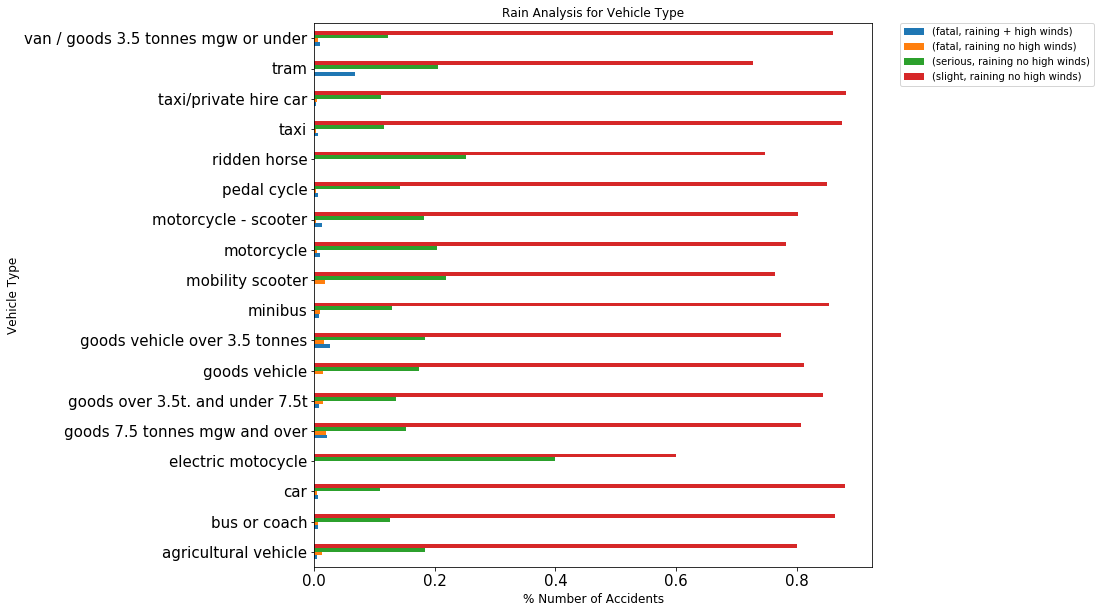

In [59]:
norm_rain_analysis_all.plot(kind='barh', title='Rain Analysis for Vehicle Type', figsize=(10,10), fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Vehicle Type', fontsize=12)
plt.xlabel('% Number of Accidents', fontsize=12)

# 7. Saving Data to a Pickle File
Here we will save the dataframes needed for our results into a pickle file.

In [60]:
pickle_save_time = %timeit -o norm_All_Num_Veh_Accidents.to_pickle("../../data/analysis/500_Analysis_Q2B_norm_All_Num_Veh_Accidents.pkl")

pickle_save_time

5.73 ms ± 229 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<TimeitResult : 5.73 ms ± 229 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)>

In [61]:
pickle_save_time = %timeit -o All_Number_of_Casualties.to_pickle("../../data/analysis/500_Analysis_Q2B_All_Number_of_Casualties.pkl")

pickle_save_time

5.49 ms ± 371 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<TimeitResult : 5.49 ms ± 371 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)>

In [62]:
pickle_save_time = %timeit -o norm_All_Number_Accident_Severity.to_pickle("../../data/analysis/500_Analysis_Q2B_norm_All_Number_Accident_Severity.pkl")

pickle_save_time

5.53 ms ± 195 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<TimeitResult : 5.53 ms ± 195 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)>

In [63]:
pickle_save_time = %timeit -o norm_All_weather_conditions_groups.to_pickle("../../data/analysis/500_Analysis_Q2B_norm_All_weather_conditions_groups.pkl")

pickle_save_time

6.04 ms ± 301 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<TimeitResult : 6.04 ms ± 301 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)>

In [64]:
pickle_save_time = %timeit -o norm_rain_analysis_all.to_pickle("../../data/analysis/500_Analysis_Q2B_norm_rain_analysis_all.pkl")

pickle_save_time

6.12 ms ± 300 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<TimeitResult : 6.12 ms ± 300 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)>

# 8. Creating Data Dictionaries
Finally, we will create a data dictionary for each pickle file.

In [65]:
data_dictionary.save(
    '../../data/analysis/500_Analysis_Q2B_norm_All_Num_Veh_Accidents.pkl', 

"""\
Aggregate raw data for Q2B number of accidents for each vehicle type.
""").head()

,count,mean,std,min,25%,50%,75%,max,Missing,%Missing
Accident_Count,18.0,0.055556,0.174065,0.000011,0.000343,0.005305,0.023665,0.747494,0,0.0


In [66]:
data_dictionary.save(
    '../../data/analysis/500_Analysis_Q2B_All_Number_of_Casualties.pkl', 

"""\
Aggregate raw data for Q2B average number of casualties for each vehicle type.
""").head()

,count,mean,std,min,25%,50%,75%,max,Missing,%Missing
Number_of_Casualties,18.0,1.048371,0.49693,0.344418,0.48125,1.2005,1.444114,1.863578,0,0.0


In [67]:
data_dictionary.save(
    '../../data/analysis/500_Analysis_Q2B_norm_All_Number_Accident_Severity.pkl', 

"""\
Aggregate raw data for Q2B Avvident Severity for each vehicle type.
""").head()

,count,mean,std,min,25%,50%,75%,max,Missing,%Missing
Accident_Severity,,,,,,,,,,
fatal,18.0,0.021438,0.014223,0.000000,0.010087,0.018148,0.030093,0.047623,0,0.0
serious,18.0,0.172121,0.048761,0.118089,0.133966,0.154877,0.208379,0.279070,0,0.0
slight,18.0,0.806441,0.052466,0.720930,0.766358,0.812579,0.847882,0.872631,0,0.0


In [68]:
data_dictionary.save(
    '../../data/analysis/500_Analysis_Q2B_norm_All_weather_conditions_groups.pkl', 

"""\
Aggregate raw data for Q2B weather conditions for vehicle type.
""").head()

,count,mean,std,min,25%,50%,75%,max,Missing,%Missing
Accident_Severity,,,,,,,,,,
fatal,136.0,0.017394,0.019392,0.000000,0.001744,0.012261,0.024946,0.142857,0,0.0
serious,136.0,0.167666,0.088439,0.000000,0.125000,0.153394,0.204226,0.666667,0,0.0
slight,136.0,0.814941,0.091671,0.333333,0.776041,0.824929,0.864666,1.000000,0,0.0


In [69]:
data_dictionary.save(
    '../../data/analysis/500_Analysis_Q2B_norm_rain_analysis_all.pkl', 

"""\
Aggregate raw data for Q2B rain analysis for vehicle type.
""").head()

count      mean       std       min       25%  \
fatal   raining + high winds    18.0  0.010707  0.015658  0.000000  0.003391   
        raining no high winds   18.0  0.007671  0.006420  0.000000  0.002854   
serious raining no high winds   18.0  0.174570  0.069822  0.108586  0.125745   
slight  raining no high winds   18.0  0.807052  0.069924  0.600000  0.776386   

                                    50%       75%       max  Missing  %Missing  
fatal   raining + high winds   0.006586  0.009174  0.066667        0       0.0  
        raining no high winds  0.005407  0.013297  0.018547        0       0.0  
serious raining no high winds  0.162674  0.198230  0.400000        0       0.0  
slight  raining no high winds  0.809609  0.859238  0.881402        0       0.0